<a href="https://colab.research.google.com/github/deeptigp09/FraudDetection/blob/main/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")



In [9]:
# Load datasets from Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/Fraud Detection/"
account = pd.read_csv(file_path + "account_activity.csv")
customer = pd.read_csv(file_path + "customer_data.csv")
fraud = pd.read_csv(file_path + "fraud_indicators.csv")
suspicion = pd.read_csv(file_path + "suspicious_activity.csv")
merchant = pd.read_csv(file_path + "merchant_data.csv")
tran_cat = pd.read_csv(file_path + "transaction_category_labels.csv")
amount = pd.read_csv(file_path + "amount_data.csv")
anomaly = pd.read_csv(file_path + "anomaly_scores.csv")
tran_data = pd.read_csv(file_path + "transaction_metadata.csv")
tran_rec = pd.read_csv(file_path + "transaction_records.csv")

In [10]:
# Merge datasets
customer_data = customer.merge(account, on='CustomerID').merge(suspicion, on='CustomerID')
transaction_data = fraud.merge(tran_cat, on="TransactionID")
transaction_data = transaction_data.merge(amount, on="TransactionID").merge(anomaly, on="TransactionID")
transaction_data = transaction_data.merge(tran_data, on="TransactionID").merge(tran_rec, on="TransactionID")
data = transaction_data.merge(customer_data, on="CustomerID")

In [11]:
# Data Overview
print("Missing Values:")
print(data.isnull().sum())
print("\nDuplicate Entries:", data.duplicated().sum())

Missing Values:
TransactionID        0
FraudIndicator       0
Category             0
TransactionAmount    0
AnomalyScore         0
Timestamp            0
MerchantID           0
Amount               0
CustomerID           0
Name                 0
Age                  0
Address              0
AccountBalance       0
LastLogin            0
SuspiciousFlag       0
dtype: int64

Duplicate Entries: 0


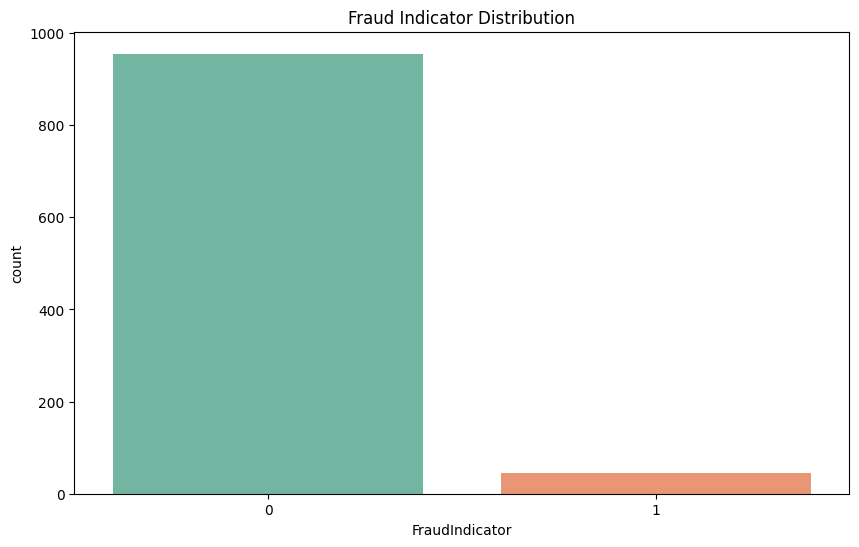

In [12]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.countplot(x='FraudIndicator', data=data, palette='Set2')
plt.title("Fraud Indicator Distribution")
plt.show()

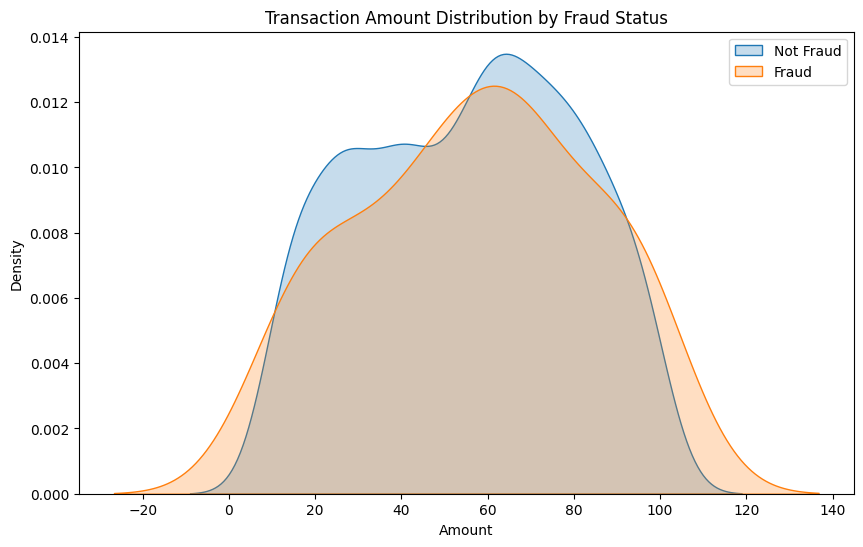

In [13]:
# KDE Plot for Transaction Amount by FraudIndicator
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['FraudIndicator'] == 0]['Amount'], label='Not Fraud', shade=True)
sns.kdeplot(data[data['FraudIndicator'] == 1]['Amount'], label='Fraud', shade=True)
plt.title("Transaction Amount Distribution by Fraud Status")
plt.legend()
plt.show()

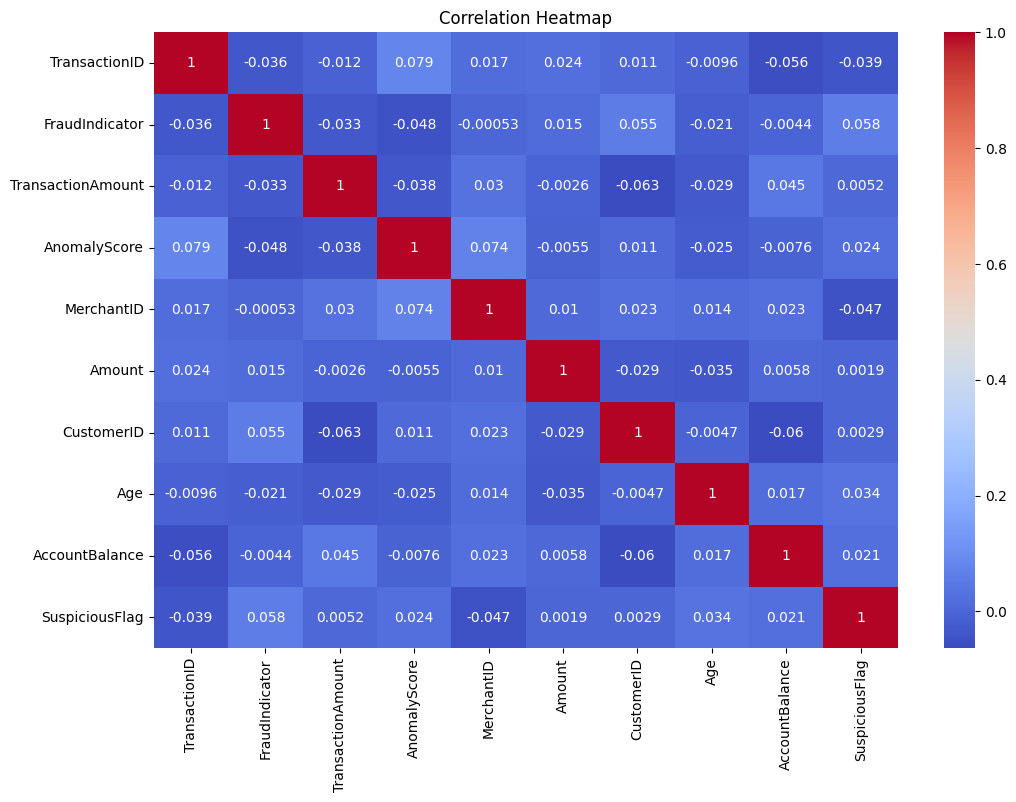

In [14]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# Outlier Detection using Z-score
numerical_columns = data.select_dtypes(include=['number']).columns
outliers = (np.abs(zscore(data[numerical_columns])) > 3).sum()
print("Outliers per numerical column:")
print(outliers)

Outliers per numerical column:
TransactionID         0
FraudIndicator       45
TransactionAmount     0
AnomalyScore          0
MerchantID            0
Amount                0
CustomerID            0
Age                   0
AccountBalance        0
SuspiciousFlag       25
dtype: int64


In [16]:
# Feature Engineering
if not pd.api.types.is_datetime64_any_dtype(data['Timestamp']):
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour
data['LastLogin'] = pd.to_datetime(data['LastLogin'])
data['Gap'] = (data['Timestamp'] - data['LastLogin']).dt.days.abs()

In [17]:
# Label Encoding for Categorical Features
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])

In [18]:
# Save processed data
processed_file_path = file_path + "processed_fraud_data.csv"
data.to_csv(processed_file_path, index=False)
print("Processed data saved at:", processed_file_path)


Processed data saved at: /content/drive/MyDrive/Colab Notebooks/Fraud Detection/processed_fraud_data.csv
